## Indian Restaurants 2023 Data Analysis

### Objective

*Analyze and visualize Indian Restaurant data to identify the top restaurants of India based on rating, cuisine, and cost analysis, determine the distribution of restaurants by city and state, and find the relationship between cost, rating, and votes.*

### Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore", message = 'is_categorical_dtype is deprecated')

In [3]:
df = pd.read_csv('restaurants.csv')

In [4]:
df.shape

(6593, 8)

In [5]:
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


In [7]:
state_mapping = {'Delhi': 'Delhi',
                 'Bangalore': 'Karnataka',
                'Mumbai': 'Maharashtra',
                'Hyderabad': 'Telangana',
                'Kolkata': 'West Bengal',
                'Pune': 'Maharashtra',
                'Chennai': 'Tamil Nadu',
                'Ahmedabad': 'Gujarat',
                'Jaipur': 'Rajasthan',
                'Gurgaon': 'Haryana',
                'Chandigarh': 'Punjab',
                'Indore': 'Madhya Pradesh',
                'Noida': 'Uttar Pradesh',
                'Lucknow': 'Uttar Pradesh',
                'Agra': 'Uttar Pradesh',
                'Goa': 'Goa',
                'Ludhiana': 'Punjab',
                'Nagpur': 'Maharashtra',
                'Ghaziabad': 'Uttar Pradesh',
                'Vadodara': 'Gujarat',
                'Udaipur': 'Rajasthan',
                'Surat': 'Gujarat',
                'Kochi': 'Kerala'}

df['State'] = df['City'].map(state_mapping)

In [8]:
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,State
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,Delhi
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,Delhi
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,Delhi
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,Delhi
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,Delhi


### Data Cleaning

In [9]:
pd.isnull(df).sum()

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
State       0
dtype: int64

*As we see that there are no null values in the table, therefore there is no need to change values of the table.*

In [11]:
df.rename(columns = {'Name':'Restaurant Name'}, inplace = True)

In [12]:
df.describe()

,Rating,Votes,Cost
count,6593.000000,6593.000000,6593.000000
mean,4.088200,119.420143,1102.798271
std,0.670031,261.849704,716.935212
min,1.000000,1.000000,100.000000
25%,3.900000,6.000000,500.000000
50%,4.200000,31.000000,900.000000
75%,4.400000,115.000000,1500.000000
max,5.000000,5016.000000,8000.000000


In [13]:
df.columns

Index(['Restaurant Name', 'Location', 'Locality', 'City', 'Cuisine', 'Rating',
       'Votes', 'Cost', 'State'],
      dtype='object')

### Exploratory Data Analysis

#### *Top rated Restaurants*

In [14]:
df.groupby(['Restaurant Name'], as_index = False)['Rating'].sum().sort_values(by = 'Rating', ascending = False).head(10)

,Restaurant Name,Rating
2001,Kanti Sweets,267.3
4445,Wow! Momo,247.3
393,Barbeque Nation,211.6
3621,Taco Bell,183.2
1185,Dindigul Thalappakatti,135.0
2292,Mad Over Donuts,128.4
1464,Frozen Bottle,115.2
3542,Subway,112.9
779,California Burrito,112.7
434,Beijing Bites,103.6


<Axes: xlabel='Restaurant Name', ylabel='Rating'>

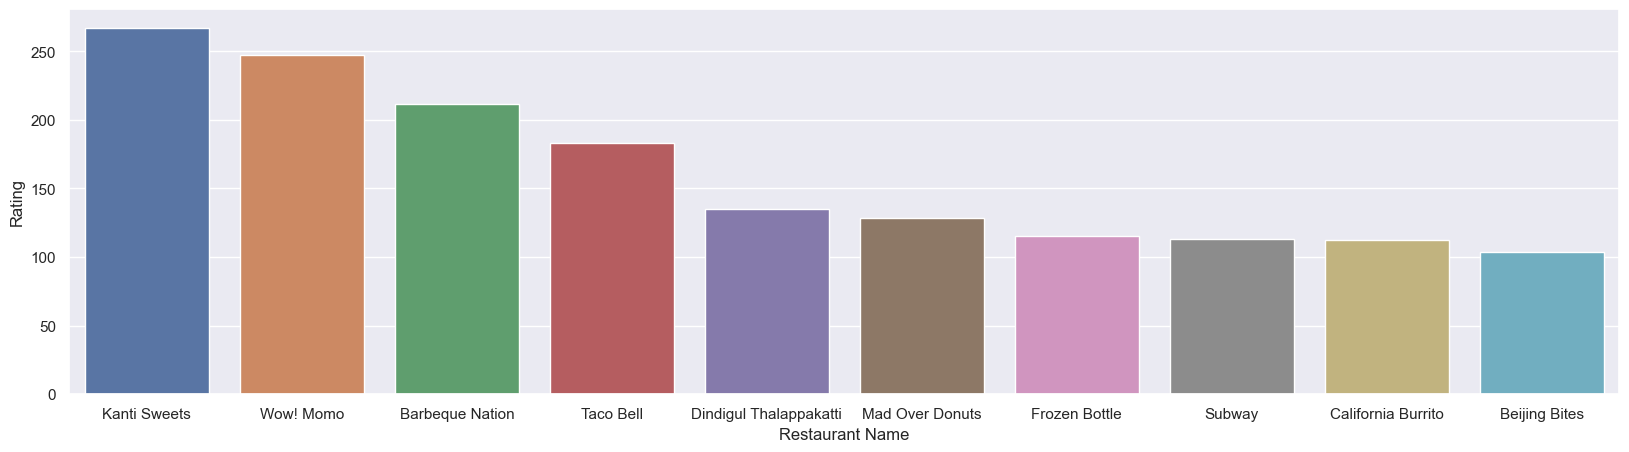

In [15]:
name_rating = df.groupby(['Restaurant Name'], as_index = False)['Rating'].sum().sort_values(by = 'Rating', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(20, 5)})
sns.barplot(x = 'Restaurant Name', y = 'Rating', data = name_rating)

<b>*From the above graph, we see that the top rated Restaurants are Kanti Sweets, Wow! Momo and Barbeque Nation.*</b>

#### *Cuisine Analysis*

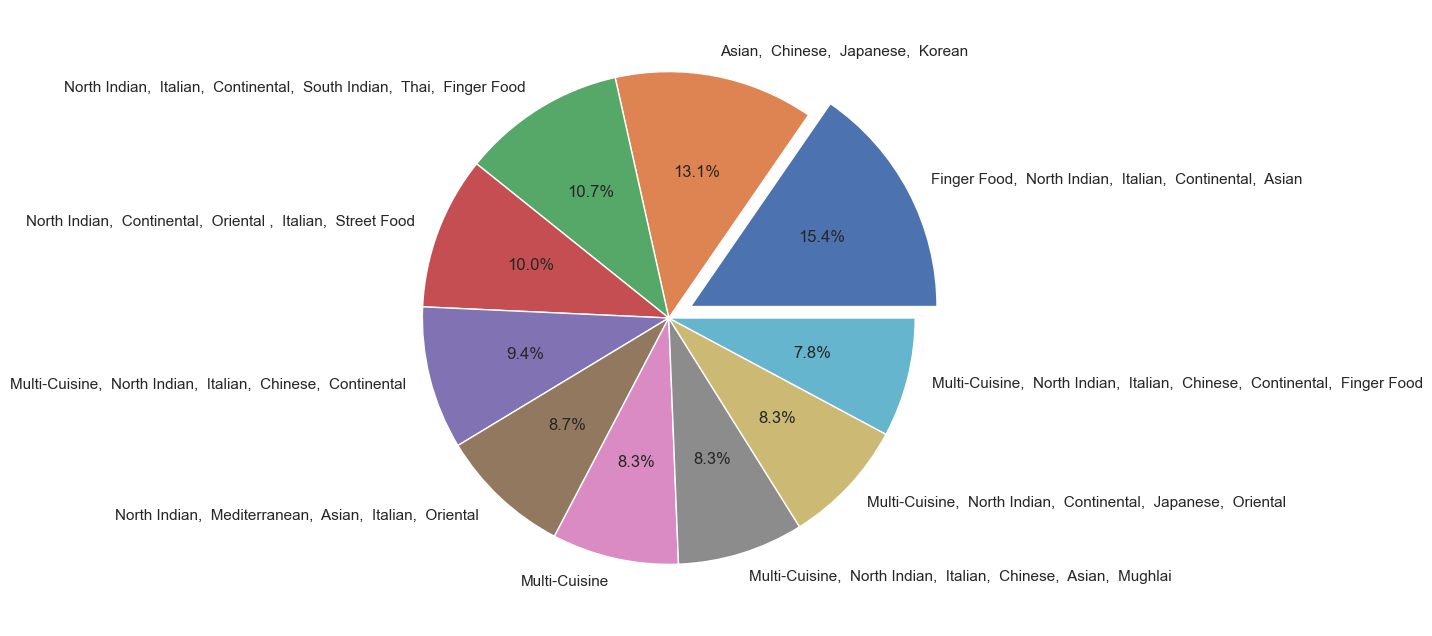

In [16]:
# cuisine_votes = df.groupby(['Cuisine'], as_index = False)['Votes'].sum().sort_values(by = 'Votes', ascending = False).head(10)

# sns.set(rc = {'figure.figsize':(20, 5)})
# sns.barplot(x = 'Cuisine', y = 'Votes', data = cuisine_votes)

sns.set(rc = {'figure.figsize':(10, 6)})
top_rated = df.sort_values(by = 'Votes', ascending = False).head(10)
explode = [0.1 if i == top_rated['Votes'].idxmax() else 0 for i in top_rated.index]
plt.figure(figsize = (8, 8))
plt.pie(top_rated['Votes'], labels = top_rated['Cuisine'], autopct = '%1.1f%%', explode = explode)
plt.show()

<b>*From the above graph, we find that the most popular Indian cuisine is North Indian food with the maximum number of votes.*</b>

#### *Cost Analysis*

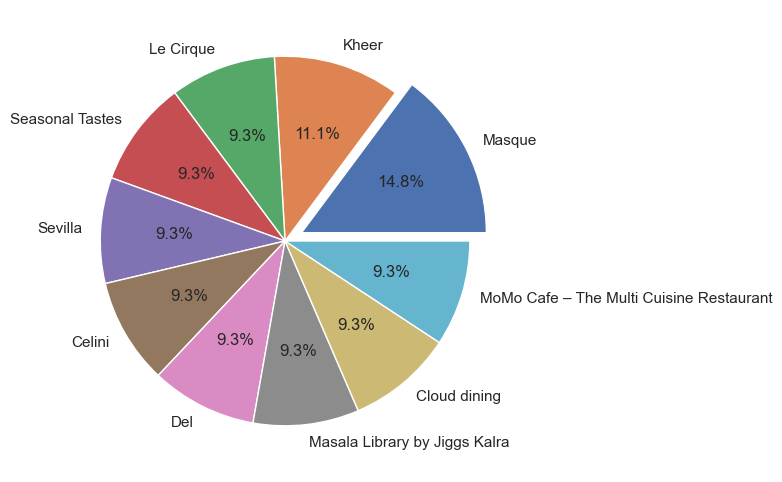

In [17]:
sns.set(rc = {'figure.figsize':(10, 6)})
top_rated = df.sort_values(by = 'Cost', ascending = False).head(10)
explode = [0.1 if i == top_rated['Cost'].idxmax() else 0 for i in top_rated.index]
plt.figure(figsize = (6, 6))
plt.pie(top_rated['Cost'], labels = top_rated['Restaurant Name'], autopct = '%1.1f%%', explode = explode)
plt.show()

<b>*From the above graph, we find that the most expensive restaurants are Masque, Kheer and Le Cirque.*</b>

#### *Geographic Analysis*

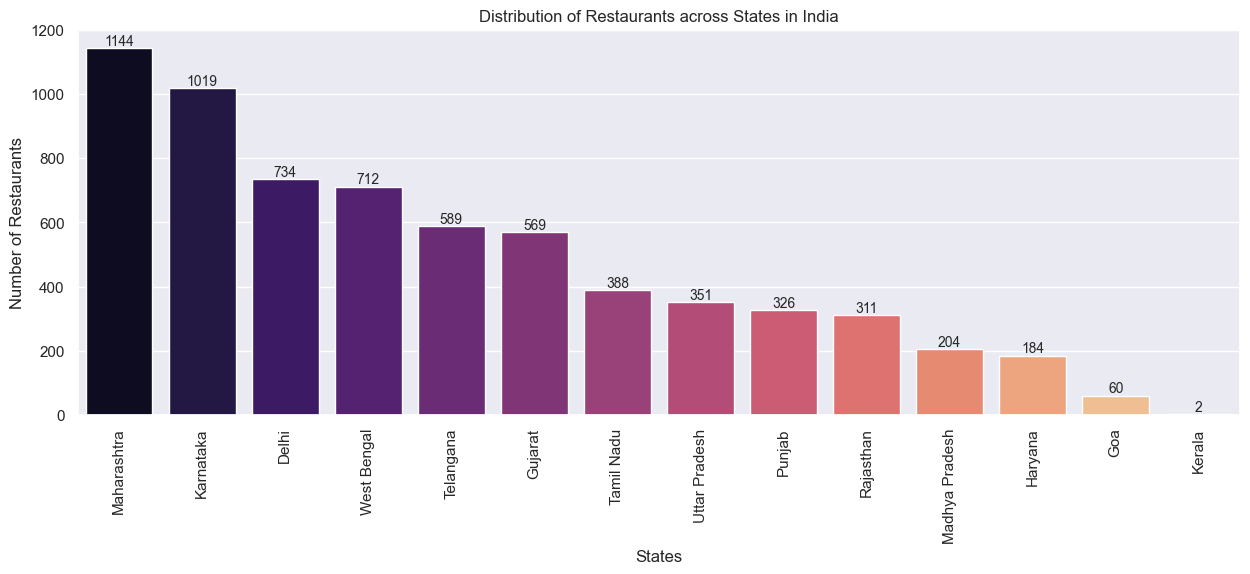

In [18]:
# countplot of cities and states
state_restaurants = df['State'].value_counts().reset_index()
state_restaurants.columns = ['State', 'Count']

plt.figure(figsize = (15, 5))
ax = sns.barplot(x = 'State', y = 'Count', data = state_restaurants, palette = 'magma')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.title('Distribution of Restaurants across States in India')
plt.xlabel('States')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 90)
plt.show()                

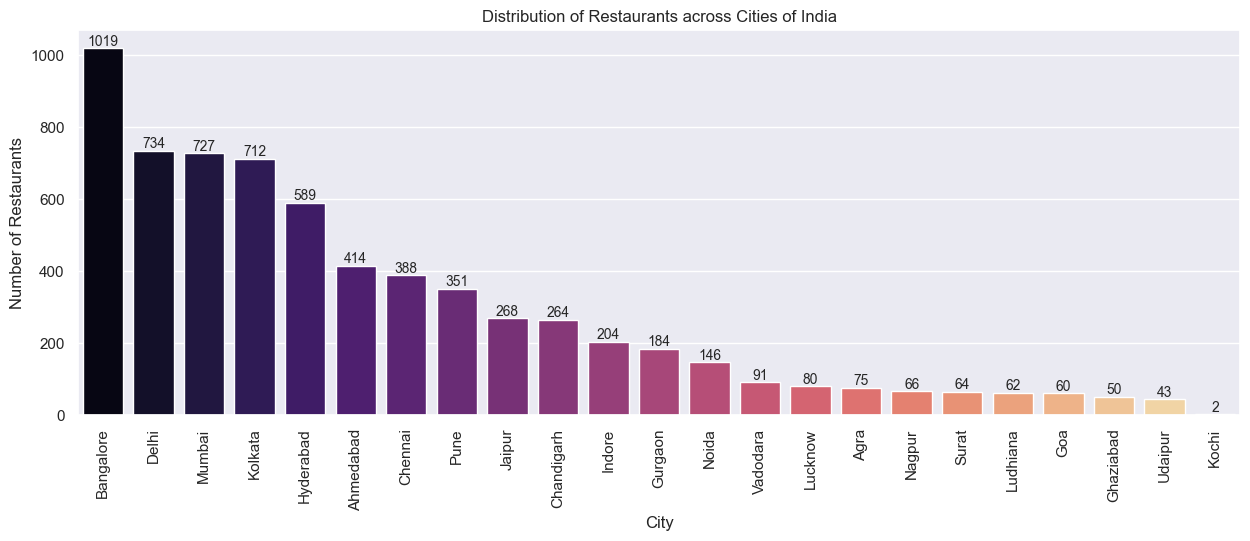

In [19]:
city_restaurants = df['City'].value_counts().reset_index()
city_restaurants.columns = ['City', 'Count']

plt.figure(figsize = (15, 5))
ax = sns.barplot(x = 'City', y = 'Count', data = city_restaurants, palette = 'magma')
ax.bar_label(ax.containers[0], fontsize = 10)
plt.title('Distribution of Restaurants across Cities of India')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 90)
plt.show()

<b>*From the above graphs, we find that the states - Maharashtra, Karnataka, Delhi and the cities - Bangalore, Delhi, Mumbai have the highest number of restaurants.*</b>

#### *Relationship between the Number of Votes a restaurant received and its Rating(Votes Analysis)*

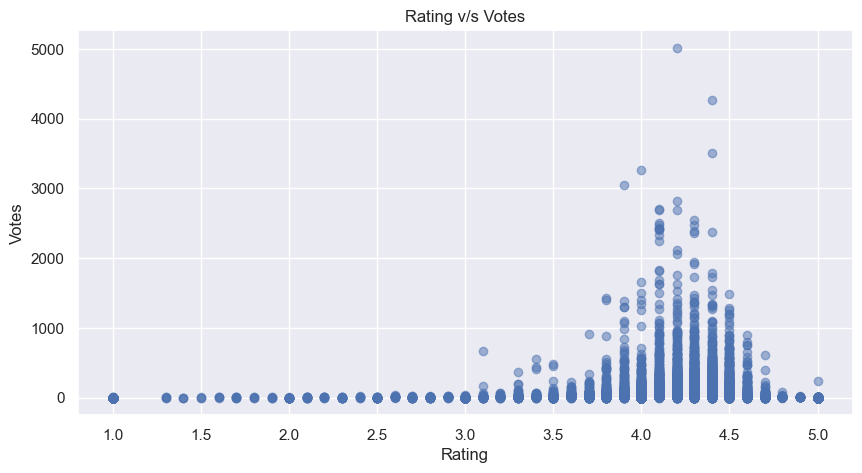

In [20]:
# pearson_corr = df['Rating'].corr(df['Votes'])
# spearman_corr = df['Rating'].corr(df['Votes'], method = 'spearman')
plt.figure(figsize = (10, 5))
plt.scatter(df['Rating'], df['Votes'], alpha = 0.5)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating v/s Votes')
plt.show()

<b>*From the above graph, we find the relationship between rating and votes that the restaurants having a rating of 4 - 4.5 have got the highest number of votes.*</b>

#### *Cost v/s Rating*

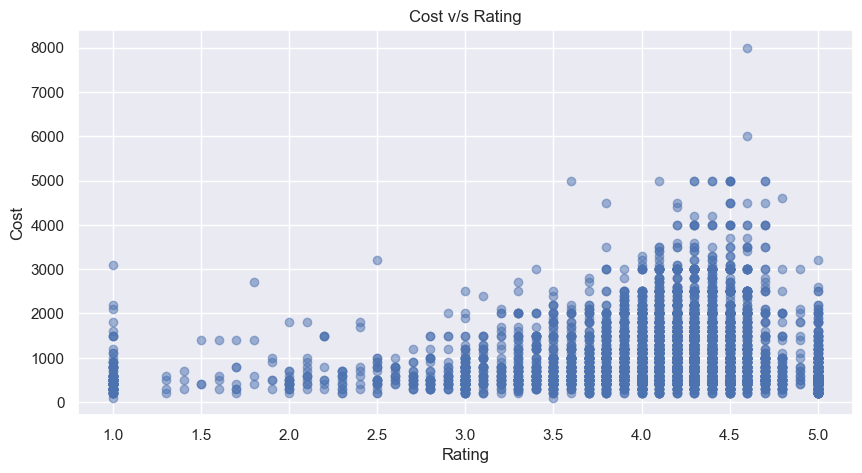

In [21]:
# cost v/s rating
plt.figure(figsize = (10, 5))
plt.scatter(df['Rating'], df['Cost'], alpha = 0.5)
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.title('Cost v/s Rating')
plt.show()

<b>*From the above graph, we find the relationship between rating and cost that the restaurants having a rating of 3.5 - 5 are the expensive restaurants.*</b>

#### *Conclusion*

*The top-rated restaurants in India are Kanti Sweets, Wow! Momo and Barbeque Nation and the most expensive restaurants are Masque, Kheer, and Le Cirque, whereas the demand for North Indian food is the highest per vote. The states - Maharashtra, Karnataka, Delhi and the cities - Bangalore, Delhi, Mumbai have the maximum number of restaurants. The relationship between cost, rating, and votes is that the top-rated restaurants receive the highest number of votes and are the expensive ones.*